In [1]:
# importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
msg=pd.read_csv('messages.csv')
msg

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [3]:
print("Shape-" , msg.shape)

Shape- (2893, 3)


In [4]:
msg.label.value_counts()

0    2412
1     481
Name: label, dtype: int64

In [5]:
msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [6]:
msg.isnull().sum().sum()

62

In [7]:
msg.isnull().values.any()

True

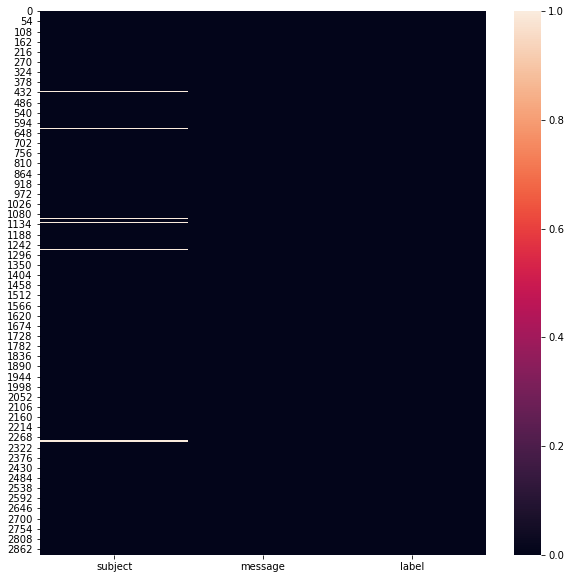

In [8]:
#checking null values by using heatmap
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(msg.isnull())

In [9]:
for column in msg.columns:
    if msg[column].dtype==object:
        print(str(column))
        count_nan_in_msg = msg[column].isnull().sum().sum()
        print ('Count of NaN: ' + str(count_nan_in_msg))
        print('**********************************')
        print('\n')

subject
Count of NaN: 62
**********************************


message
Count of NaN: 0
**********************************




In [10]:
#Ratio
print ('spam ratio = ', round(len(msg[msg['label']==1]) / len(msg.label),2)*100,'%')
print ('non-spam ratio  = ', round(len(msg[msg['label']==0]) / len(msg.label),2)*100,'%')

spam ratio =  17.0 %
non-spam ratio  =  83.0 %


In [11]:
msg['l1']=msg.subject.str.len()
msg['l2']=msg.message.str.len()
msg

,subject,message,label,l1,l2
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39.0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,NaN,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50.0,1435
3,risk,a colleague and i are researching the differin...,0,4.0,324
4,request book information,earlier this morning i was on the phone with a...,0,24.0,1046
...,...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1,28.0,262
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1,34.0,2163
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0,34.0,1039
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0,54.0,2949


In [12]:
msg.dropna(inplace=True)

In [13]:
msg.shape

(2831, 5)

In [14]:
for column in msg.columns:
    if msg[column].dtype==object:
        print(str(column))
        count_nan_in_msg = msg[column].isnull().sum().sum()
        print ('Count of NaN: ' + str(count_nan_in_msg))
        print('**********************************')
        print('\n')

subject
Count of NaN: 0
**********************************


message
Count of NaN: 0
**********************************




# 1.Data Preparation

In [15]:
msg['subject']=msg['subject'].str.lower()
msg['message']=msg['message'].str.lower()


In [16]:
msg.head()

,subject,message,label,l1,l2
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39.0,2856
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50.0,1435
3,risk,a colleague and i are researching the differin...,0,4.0,324
4,request book information,earlier this morning i was on the phone with a...,0,24.0,1046
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,51.0,4492


In [17]:
# Replace email addresses with 'email'
msg['subject'] = msg['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
msg['subject'] = msg['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
msg['subject'] = msg['subject'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
msg['subject'] = msg['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
msg['subject'] = msg['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [18]:
# Replace email addresses with 'email'
msg['message'] = msg['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
msg['message'] = msg['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
msg['message'] = msg['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
msg['message'] = msg['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
msg['message'] = msg['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [19]:
msg

,subject,message,label,l1,l2
0,job posting - apple-iss research center,content - length : numbr apple-iss research ce...,0,39.0,2856
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50.0,1435
3,risk,a colleague and i are researching the differin...,0,4.0,324
4,request book information,earlier this morning i was on the phone with a...,0,24.0,1046
5,call for abstracts : optimality in syntactic t...,content - length : numbr call for papers is th...,0,51.0,4492
...,...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1,28.0,262
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1,34.0,2163
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0,34.0,1039
2891,"re : numbr . numbr , comparative method : n - ...",gotcha ! there are two separate fallacies in t...,0,54.0,2949


In [20]:
# Remove punctuation from subject column
# Remove punctuation
msg['subject'] = msg['subject'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
msg['subject'] = msg['subject'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
msg['subject'] = msg['subject'].str.replace(r'^\s+|\s+?$', '')

In [21]:
# Remove punctuation from message column
# Remove punctuation
msg['message'] = msg['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
msg['message'] = msg['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
msg['message'] = msg['message'].str.replace(r'^\s+|\s+?$', '')

In [22]:
msg.head()

,subject,message,label,l1,l2
0,job posting apple iss research center,content length numbr apple iss research center...,0,39.0,2856
2,query letter frequencies for text identification,i am posting this inquiry for sergei atamas sa...,0,50.0,1435
3,risk,a colleague and i are researching the differin...,0,4.0,324
4,request book information,earlier this morning i was on the phone with a...,0,24.0,1046
5,call for abstracts optimality in syntactic theory,content length numbr call for papers is the be...,0,51.0,4492


# 2. Building word dictionary

In [23]:
import string
import nltk
from nltk.corpus import  stopwords


In [24]:
stop_words = set(stopwords.words('english'))

msg['subject'] = msg['subject'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
                 
msg['message'] = msg['message'].apply(lambda y: ' '.join(
    term for term in y.split() if term not in stop_words))


In [25]:
# New columns (clean_lengths) after puncuations,stopwords removal
msg['clean_length_l1'] = msg.subject.str.len()
msg['clean_length_l2'] = msg.message.str.len()


In [26]:
msg

,subject,message,label,l1,l2,clean_length_l1,clean_length_l2
0,job posting apple iss research center,content length numbr apple iss research center...,0,39.0,2856,37,2179
2,query letter frequencies text identification,posting inquiry sergei atamas satamas umabnet ...,0,50.0,1435,44,1064
3,risk,colleague researching differing degrees risk p...,0,4.0,324,4,210
4,request book information,earlier morning phone friend mine living south...,0,24.0,1046,24,629
5,call abstracts optimality syntactic theory,content length numbr call papers best good eno...,0,51.0,4492,42,3370
...,...,...,...,...,...,...,...
2888,love profile ysuolvpv,hello thanks stopping taken many new pics made...,1,28.0,262,21,132
2889,asked join kiddin,list owner kiddin invited join mailing list li...,1,34.0,2163,17,1217
2890,anglicization composers names,judging return post must sounded like kind sel...,0,34.0,1039,29,643
2891,numbr numbr comparative method n ary comparison,gotcha two separate fallacies argument n ary c...,0,54.0,2949,47,1873


# 3. Feature Extraction

In [27]:
# Total lengths of subject and message columns before and after removal

print ('Original Length of subject column', msg.l1.sum())
print ('New/clean Length of subject column', msg.clean_length_l1.sum())
print ('Original Length of message column', msg.l2.sum())
print ('New/clean Length of message column', msg.clean_length_l2.sum())

Original Length of subject column 91663.0
New/clean Length of subject column 78357
Original Length of message column 9186422
New/clean Length of message column 6646683


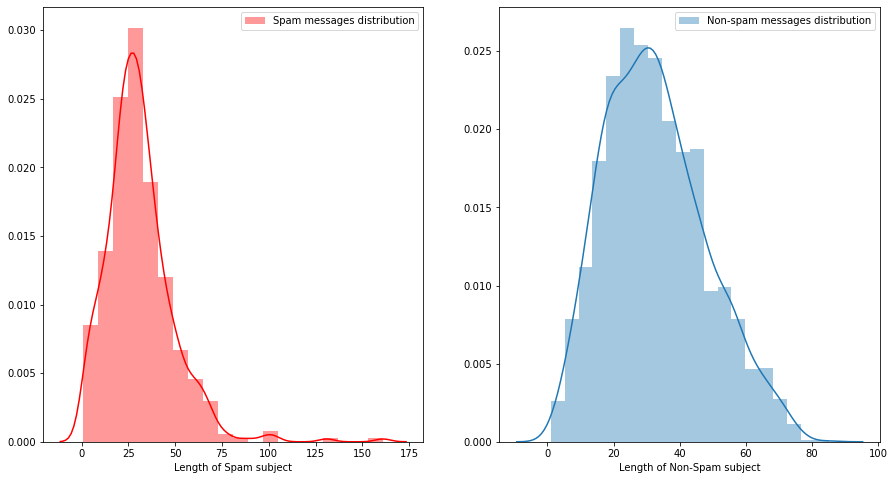

In [28]:
# Word count distribution BEFORE cleaning for subject column

f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(msg[msg['label']==1]['l1'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Length of Spam subject')
ax[0].legend()

sns.distplot(msg[msg['label']==0]['l1'],bins=20,ax=ax[1],label='Non-spam messages distribution')
ax[1].set_xlabel('Length of Non-Spam subject')
ax[1].legend()

plt.show()

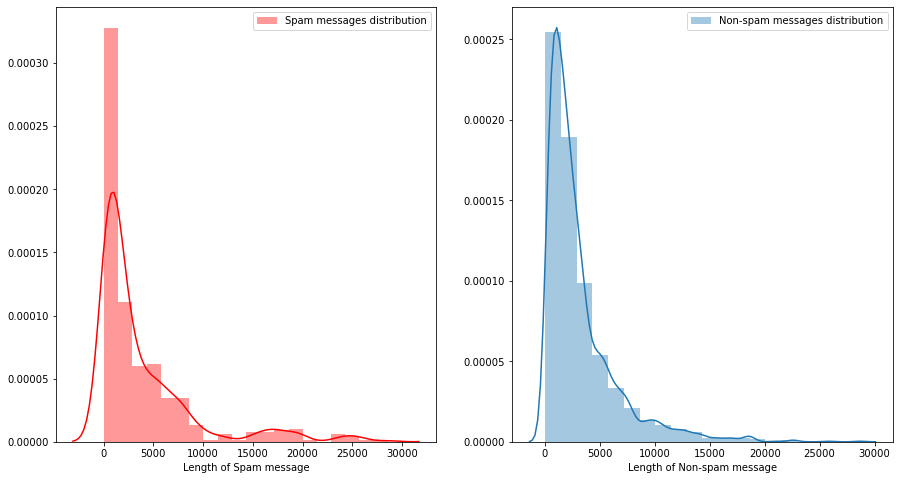

In [29]:
# Word count distribution BEFORE cleaning for message column
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(msg[msg['label']==1]['l2'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Length of Spam message')
ax[0].legend()

sns.distplot(msg[msg['label']==0]['l2'],bins=20,ax=ax[1],label='Non-spam messages distribution')
ax[1].set_xlabel('Length of Non-spam message')
ax[1].legend()

plt.show()

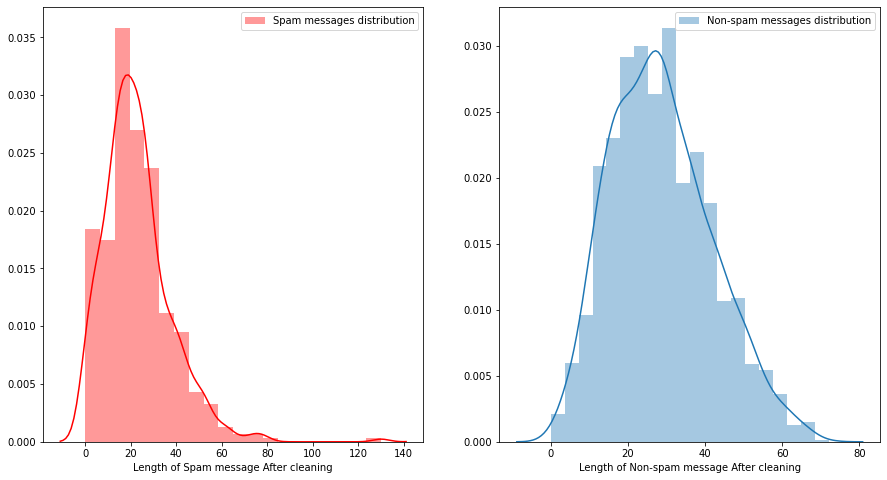

In [30]:
# Word count distribution AFTER cleaning for subject column
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(msg[msg['label']==1]['clean_length_l1'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Length of Spam message After cleaning')
ax[0].legend()

sns.distplot(msg[msg['label']==0]['clean_length_l1'],bins=20,ax=ax[1],label='Non-spam messages distribution')
ax[1].set_xlabel('Length of Non-spam message After cleaning')
ax[1].legend()

plt.show()


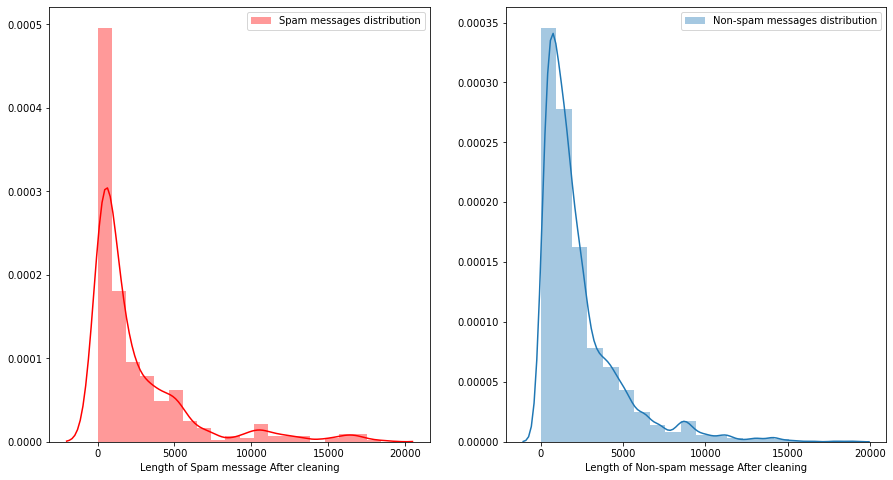

In [31]:
# Word count distribution AFTER cleaning for message column
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(msg[msg['label']==1]['clean_length_l2'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Length of Spam message After cleaning')
ax[0].legend()

sns.distplot(msg[msg['label']==0]['clean_length_l2'],bins=20,ax=ax[1],label='Non-spam messages distribution')
ax[1].set_xlabel('Length of Non-spam message After cleaning')
ax[1].legend()

plt.show()


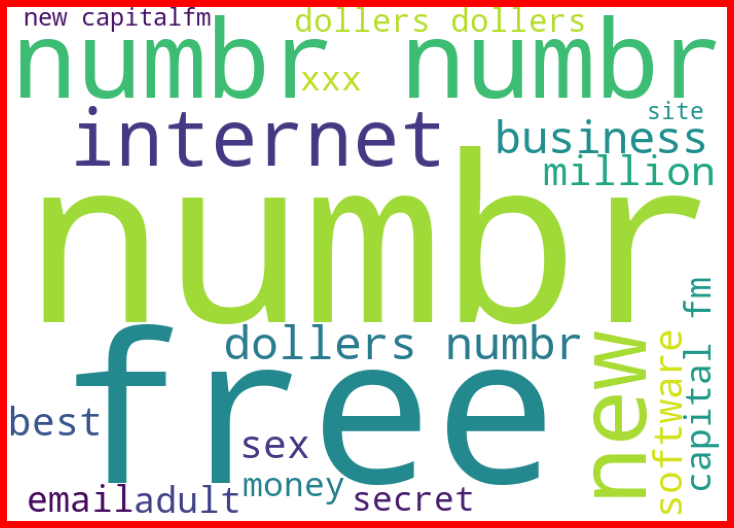

In [34]:
#Getting a sense of loud words in spam for subject column
from wordcloud import WordCloud


spams = msg['subject'][msg['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

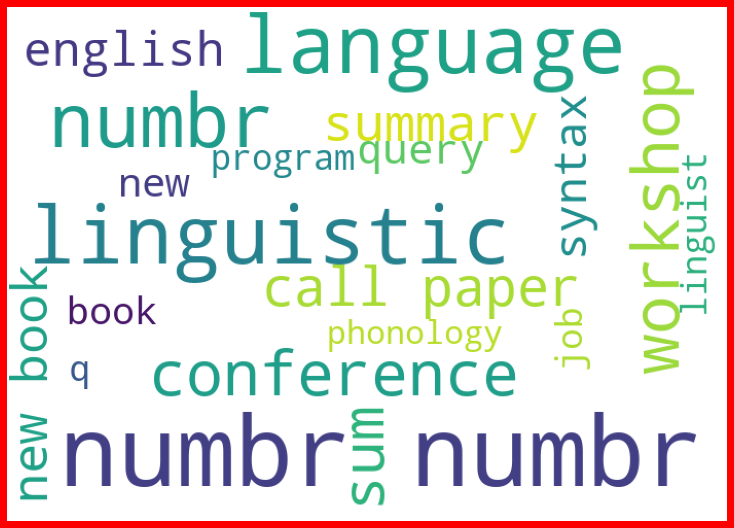

In [37]:
#Getting a sense of loud words in spam for subject column
from wordcloud import WordCloud


non_spams = msg['subject'][msg['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(non_spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

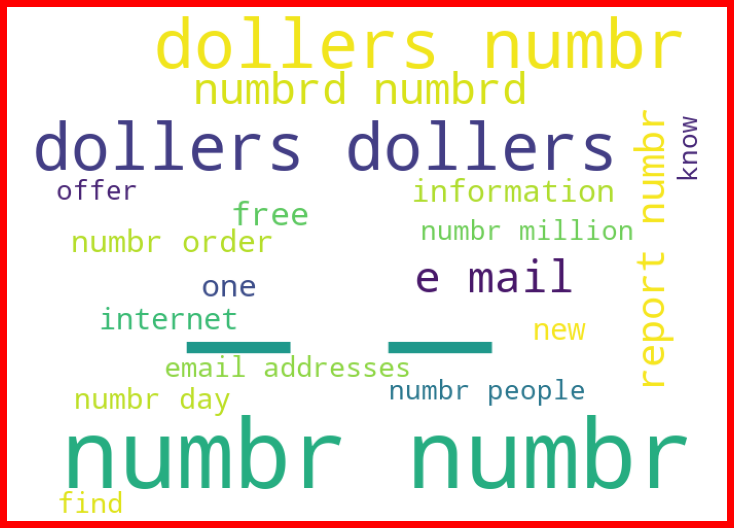

In [36]:
#Getting a sense of loud words in spam for message column
from wordcloud import WordCloud


spams = msg['message'][msg['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

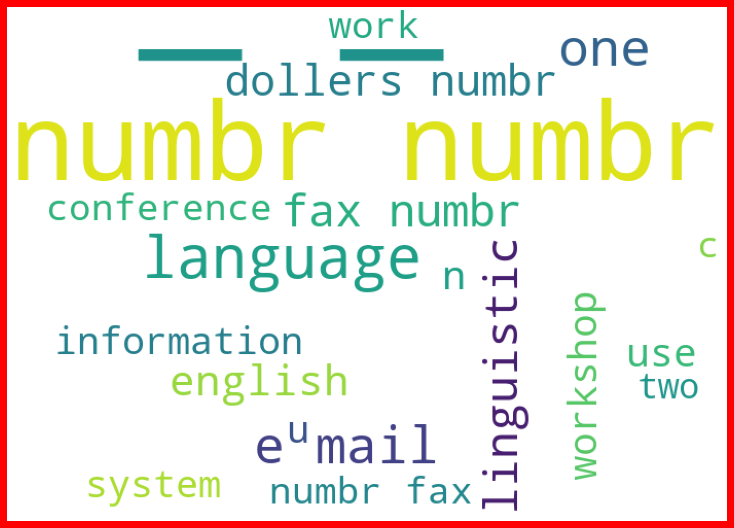

In [38]:
#Getting a sense of loud words in spam for message column
from wordcloud import WordCloud


non_spams = msg['message'][msg['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(non_spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# 4.Training Classifiers

In [39]:
# Convert text into vectors using TF-IDF
# Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tf_vec = TfidfVectorizer()

features = msg["subject"] + msg["message"]

x = tf_vec.fit_transform(features)

y = msg['label']

In [40]:
# Train and predict
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

# 5. Testing

In [46]:
#importing all the libraries required for carrying out machine learning process
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,roc_auc_score

In [47]:
#using a range of base algorithms
lg=LogisticRegression()
KNN=KNeighborsClassifier()
SV=SVC()
DT=DecisionTreeClassifier()
MNB=MultinomialNB()

In [48]:
#creating a list model where each of the models will be appended 
models=[]
models.append(('LogisticRegression',lg))
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))
models.append(('MultinomialNB',MNB))

************** LogisticRegression ***************


LogisticRegression()


Accuracy_score= 0.9576271186440678


Cross_Val_Score= 0.9530172199273379


roc_auc_score= 0.8790322580645161


classification report
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       584
           1       1.00      0.76      0.86       124

    accuracy                           0.96       708
   macro avg       0.98      0.88      0.92       708
weighted avg       0.96      0.96      0.96       708



[[584   0]
 [ 30  94]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************** KNeighborsClassifier ***************


KNeighborsClassifier()


Accuracy_score= 0.9646892655367232


Cross_Val_Score= 0.9597322450604688


roc_auc_score= 0.9436588599204595


classification report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       584
           1       0.89      0.91      0.90       124

    accuracy  

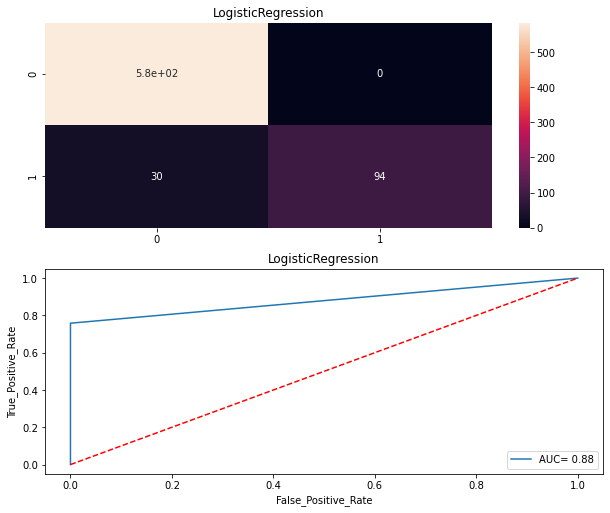

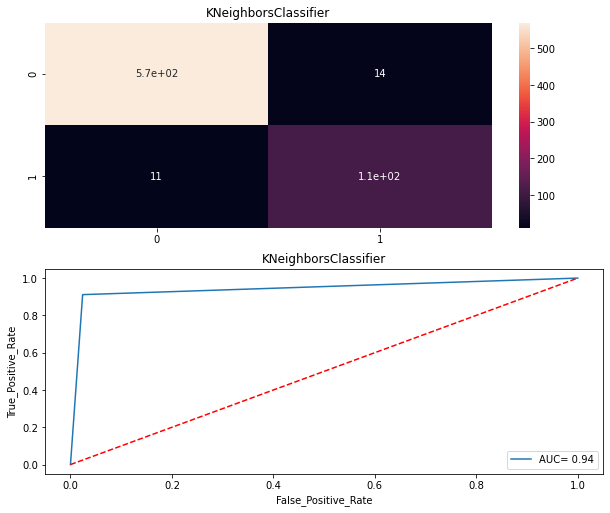

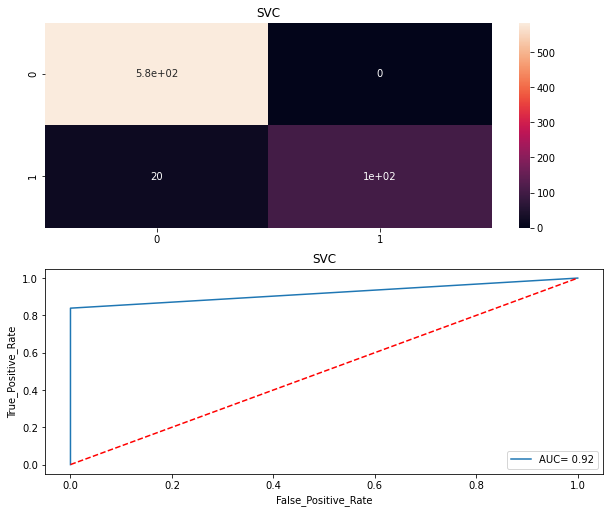

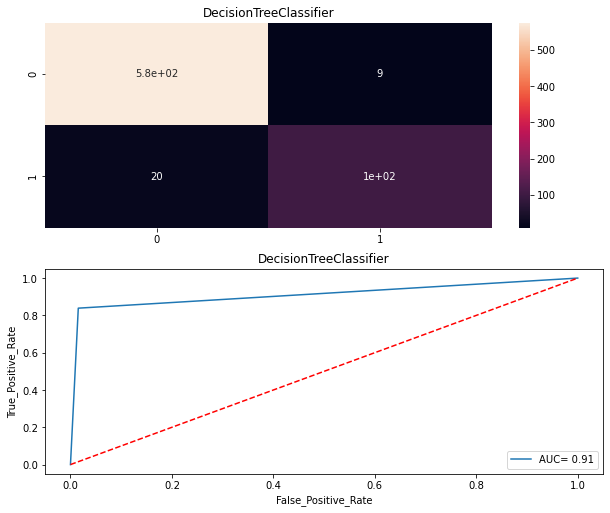

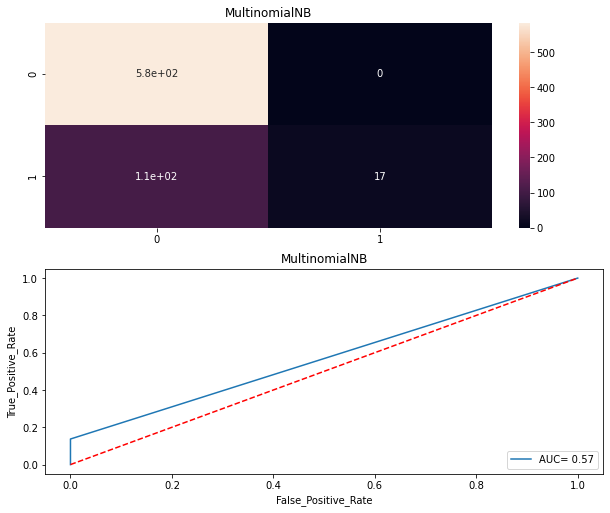

In [49]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_Positive_Rate')
    plt.xlabel('False_Positive_Rate')
    print('\n\n')

In [50]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,95.762712,95.301722,87.903226
1,KNeighborsClassifier,96.468927,95.973225,94.365886
2,SVC,97.175141,97.491788,91.935484
3,DecisionTreeClassifier,95.903955,94.772433,91.164936
4,MultinomialNB,84.887006,86.047877,56.854839


# 6. Performance evaluation using multiple metrics

SO we choose SVC as our best model because it has the highest scores as we can see from the table above.

# Saving the best model

In [51]:
#save model as a pickle file
import joblib
joblib.dump(SVC,'Spam.obj')

['Spam.obj']